# Exploratory Data Analysis of Employee Attrition

## Importing Libraries & Reading Data

In [1]:
#DATA MANIPULATION LIBRARIES
import pandas as pd
import numpy as np

#MATHEMATICAL LIBRARIES
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
import scipy.stats as ss

#VISUALISATION LIBRARIES
import seaborn as sns
from matplotlib import pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING DATA AS CSV FILE AND PREVIEWING DATA
data = pd.read_csv(os.path.join(os.getcwd(), "HR-Employee-Attrition.csv"))
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Manipulation

1. Removing variables: 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'
2. Splitting into categorical and numerical variables

In [3]:
#CONVERTING BINARY CATEGORICAL VARIABLES TO 1s AND 0s
data['Attrition'] = [1 if i == "Yes" else 0 for i in data['Attrition']]
data['OverTime'] = [1 if i == "Yes" else 0 for i in data['OverTime']]
data['Gender_M'] = [1 if i == "Male" else 0 for i in data['Gender']]

#DROPPING UNNECESSARY COLUMNS WITH HOMOGENEOUS ENTRIES
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'Gender'], axis=1)

#SPLITTING DATA INTO CATEGORICAL AND NUMERICAL DATA
num_data = data[['Age', 'DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate',
                 'NumCompaniesWorked','PercentSalaryHike','EnvironmentSatisfaction','JobInvolvement', 
                 'JobLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'JobSatisfaction', 'PerformanceRating',
                 'RelationshipSatisfaction', 'WorkLifeBalance',  'StockOptionLevel',
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
cat_data = data[['Attrition', 'BusinessTravel', 'Department','Education', 'EducationField',
                 'Gender_M',  'JobRole', 'MaritalStatus', 'OverTime']]

# Relationships between Attrition and Numerical Variables

<AxesSubplot:ylabel='Correlation'>

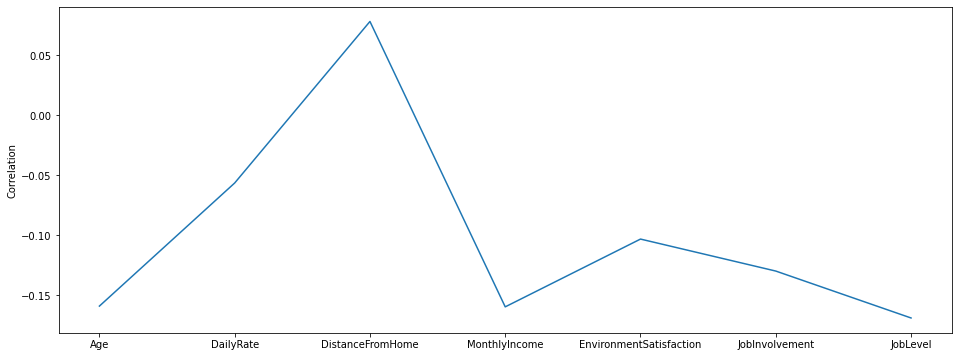

In [4]:
#CREATING A TABLE OF BISERIAL CORRELATIONS BETWEEN ATTRITION AND NUMERICAL VARIABLES
lst1=[]
lst2=[]
for i in range(len(num_data.columns)):
    col_name = num_data.columns[i]
    value = pointbiserialr(cat_data.Attrition.to_numpy(), num_data[col_name].to_numpy())
    lst1.append(value[0])
    lst2.append(value[1])

biserial_corr = pd.DataFrame({"Correlation": lst1, "P-Value": lst2}, index = num_data.columns)
#OUTPUT INTO AN EXCEL FILE RUN IN TABLEAU
#biserial_corr.to_excel("biserial_corr.xlsx")


#FOLLOWING VARIABLES HAVE P-VALUES ABOVE 0.05 FOR THEIR CORRELATION: "HourlyRate", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion"
biserial_corr = biserial_corr.drop(["HourlyRate", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion", "PerformanceRating", "RelationshipSatisfaction"], axis = 0)
num_data = num_data.drop(["HourlyRate", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion", "PerformanceRating",  "RelationshipSatisfaction"], axis = 1)
data = data.drop(["HourlyRate", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion", "PerformanceRating",  "RelationshipSatisfaction"], axis = 1)

#PLOTTING LINE PLOT OF BISERIAL CORRELATIONS (PT 1)
plt.figure(figsize=(16,6))
sns.lineplot(x=biserial_corr.index[0:7], y=biserial_corr.Correlation[0:7])


<AxesSubplot:ylabel='Correlation'>

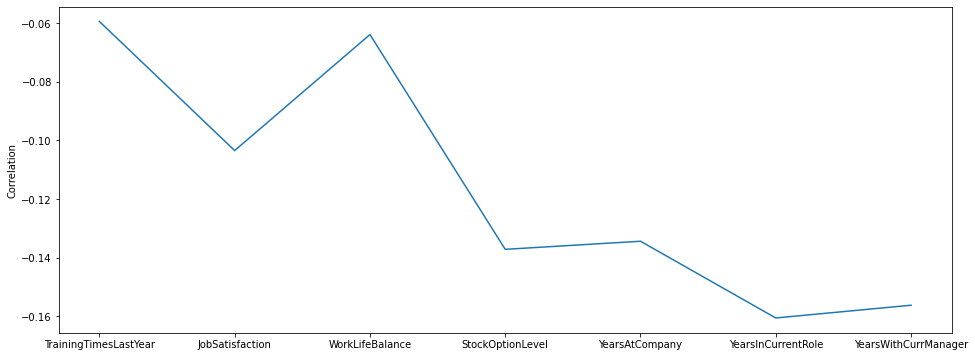

In [5]:
#PLOTTING LINE PLOT OF BISERIAL CORRELATIONS (PT 2)
plt.figure(figsize=(16,6))
sns.lineplot(x=biserial_corr.index[8:16], y=biserial_corr.Correlation[8:16])

# Relationships Between Numerical Variables

Text(0.5, 1.0, 'Correlation Heatmap')

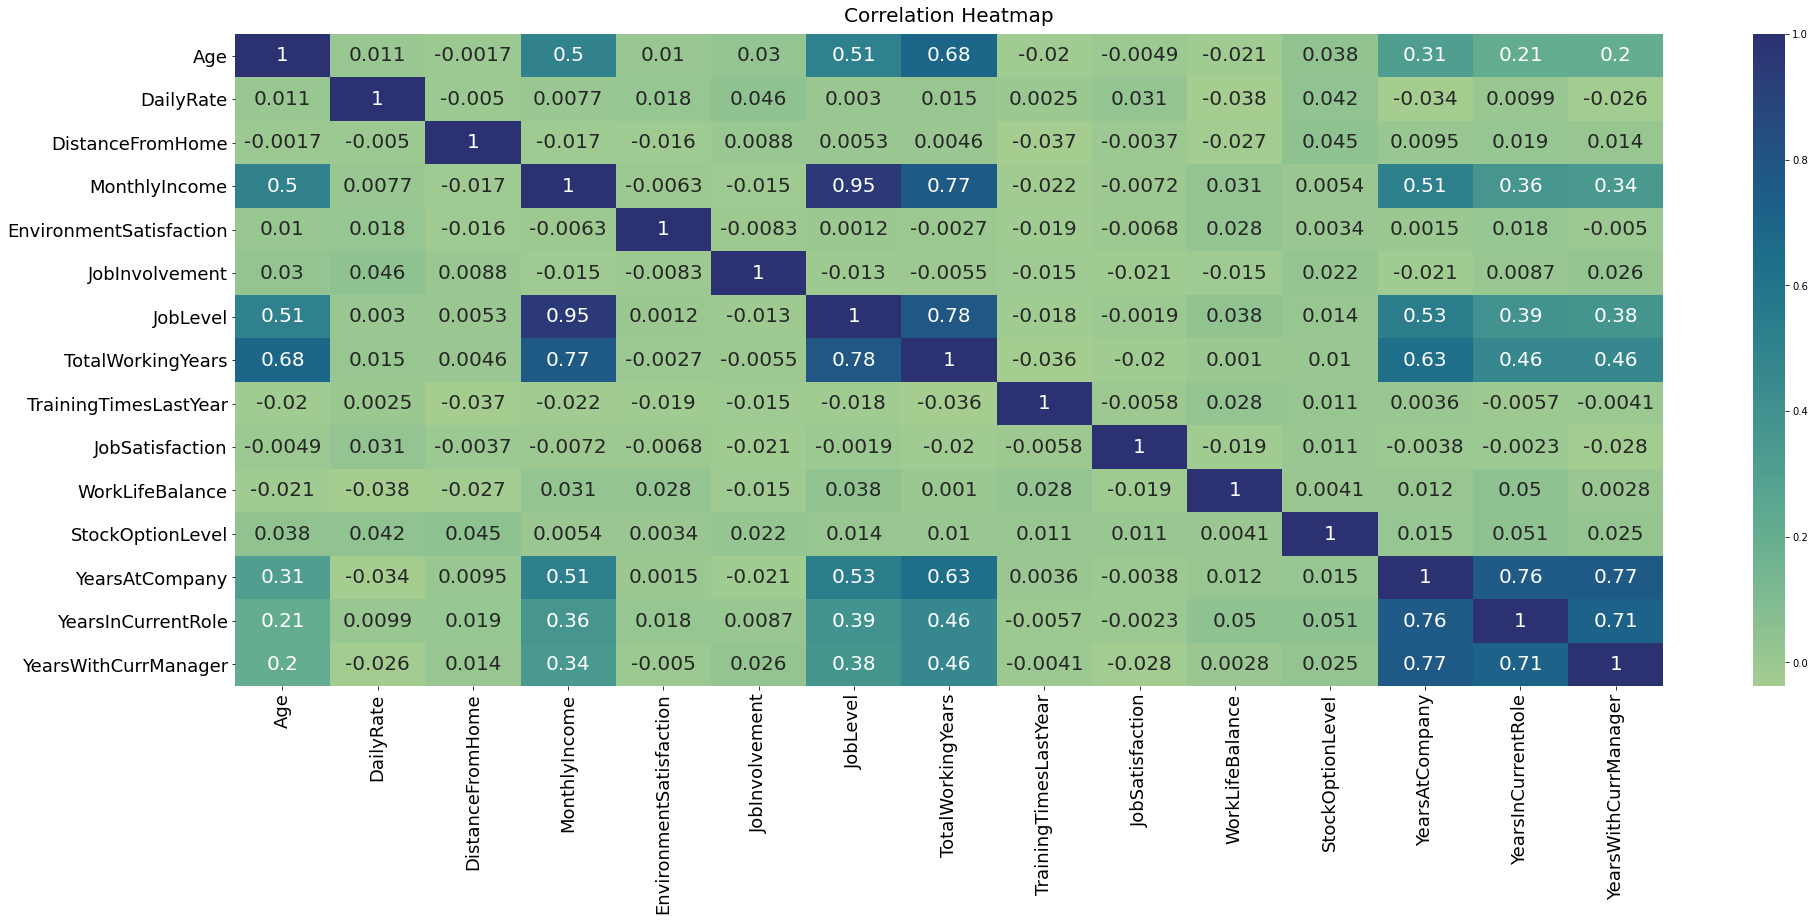

In [6]:
#CORRELATION MATRTIX OF RELATIONSHIPS BETWEEN NUMERICAL VARIABLES
plt.figure(figsize=(32,12))
corrMatrix = num_data.corr()
#corrMatrix.to_excel('corrMatrix.xlsx') 

#HEATMAP OF CORRELATION MATRIX
heatmap = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 20}, cmap="crest")
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18, rotation=90)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

### DROP: TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, MonthlyIncome
### KEEP: YearsInCurrentRole (higher correlation with attrition) & JobLevel

Correlation Coefficient used: 0.7

In [7]:
#DROPPING COLUMNS THAT ARE HIGHLY CORRELATED WITH OTHER COLUMNS
data = data.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'MonthlyIncome'], axis=1)
num_data = num_data.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'MonthlyIncome'], axis=1)

# Relationships between Categorical Variables

[Text(0, 0.5, 'BusinessTravel'),
 Text(0, 1.5, 'Department'),
 Text(0, 2.5, 'Education'),
 Text(0, 3.5, 'EducationField'),
 Text(0, 4.5, 'Gender_M'),
 Text(0, 5.5, 'JobRole'),
 Text(0, 6.5, 'MaritalStatus'),
 Text(0, 7.5, 'OverTime')]

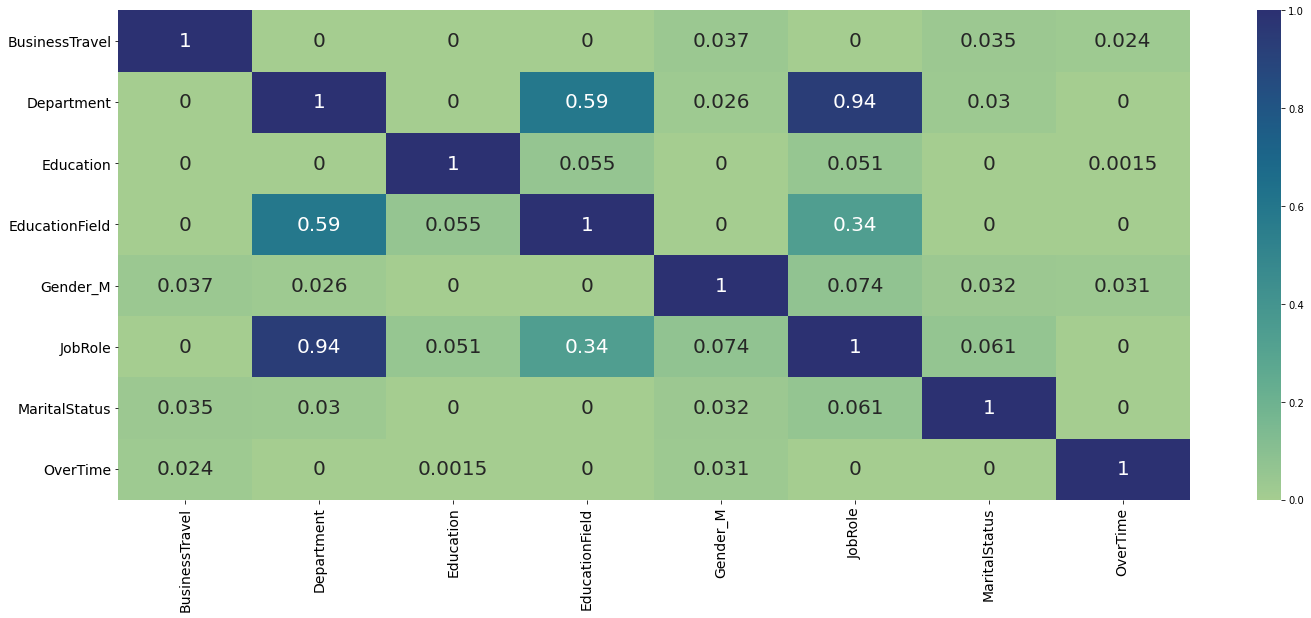

In [8]:
#FUNCTION OF CRAMER V CORRELATION TO MAKE A TABLE OF RELATIONSHIPS BETWEEN CATEGORICAL VARIABLES
def cramers_corrected_stat(column1, column2):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(cat_data[column1],cat_data[column2])
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    p = ss.chi2_contingency(confusion_matrix)[1]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    final = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return final

#FUNCTION OF CRAMER V CORRELATION P-VALUES TO UNDERSTAND SIGNIFICANCE OF RELATIONSHIPS BETWEEN CATEGORICAL VARIABLES
def cramers_p(column1, column2):
    confusion_matrix = pd.crosstab(cat_data[column1],cat_data[column2])
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    p = ss.chi2_contingency(confusion_matrix)[1]
    return p

#DATAFRAMES OF CORRELATION MATRIX AND P-VALUE MATRIX RESPECTIVELY FOR CATEGORICAL VARIABLES
result_df = pd.DataFrame(columns = cat_data.columns, index = cat_data.columns)
pval_df = pd.DataFrame(columns = cat_data.columns, index = cat_data.columns)

for col1 in cat_data:
    for col2 in cat_data:
        result_df[col1][col2] = cramers_corrected_stat(col1,col2)
        pval_df[col1][col2] = cramers_p(col1,col2)

#result_df.to_excel("result_df.xlsx")
#pval_df.to_excel("pval_df.xlsx") 

#PLOTTING CORRELATION MATRIX AS HEATMAP
plt.figure(figsize=(24,9))
result_df = result_df.apply(pd.to_numeric)
cramers_heatmap = sns.heatmap(result_df.iloc[1:, 1:], annot=True, annot_kws={"size": 20}, cmap="crest")
cramers_heatmap.set_xticklabels(cramers_heatmap.get_xmajorticklabels(), fontsize = 14, rotation=90)
cramers_heatmap.set_yticklabels(cramers_heatmap.get_ymajorticklabels(), fontsize = 14)


<AxesSubplot:ylabel='Attrition'>

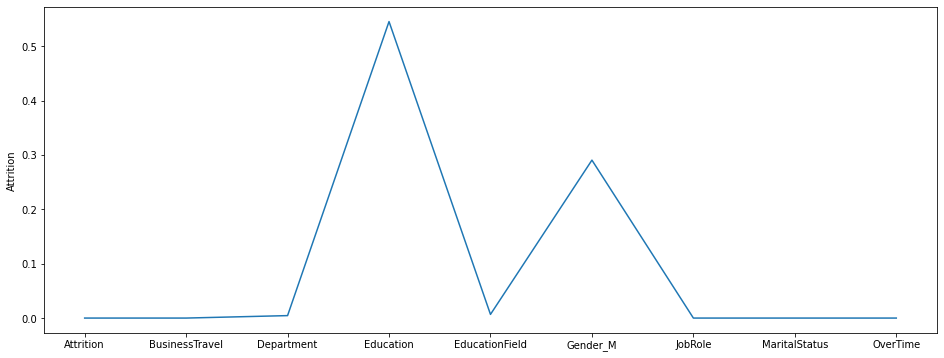

In [9]:
#VISUALISING SIGNIFICANCE OF CATEGORICAL VARIABLES TO ATTRITION BASED ON SIGNIFICANCE IN CRAMER-V CORRELATION
pval_df=pval_df[["Attrition"]]
plt.figure(figsize=(16,6))
sns.lineplot(x=pval_df.index, y=pval_df.Attrition)

### DROP: JobRole, Education, Gender
### KEEP: Department, which accounts for JobRole. Judgement call.

In [10]:
#DROP CATEGORICAL VARIABLES WITH HIGH CORRELATION >0.7, AS WELL AS THOSE THAT ARE INSIGNIFICANT TO ATTRITION BASED ON P-VALUE MATRIX
data = data.drop(['JobRole', 'Education', 'Gender_M'], axis=1)
cat_data = cat_data.drop(['JobRole', 'Education', 'Gender_M'], axis=1)

# Boxplots of Relationships between Attrition and Selected Numerical Variables

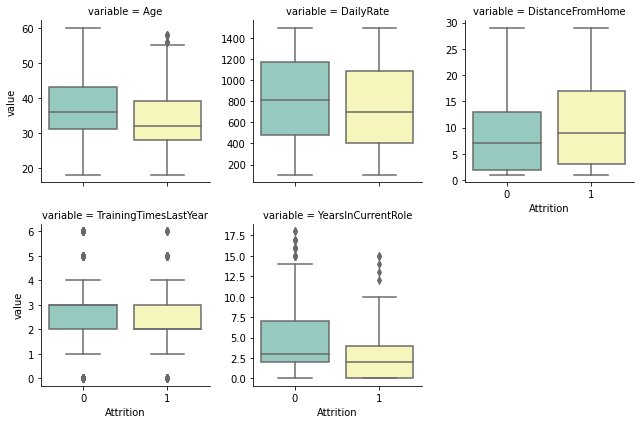

In [11]:
#BOXPLOT OF RELATIONSHIPS BETWEEN A SUBSET OF NUMERICAL VARIABLES AND ATTRITION. THIS SUBSET IS CHOSEN BASED ON NON-ORDINAL VARIABLES. VARIABLES LIKE JOBSATISFACTION
#ARE NOT INCLUDED SINCE THEY HAVE A CONSISTENT RANGE OF VALUES.
cols = ['Attrition','Age', 'DistanceFromHome', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'DailyRate']
temp = data[cols]
temp = data.melt(id_vars=['Attrition'])
grid = sns.axisgrid.FacetGrid(temp[temp.variable.isin(cols)], col='variable', sharey=False, col_wrap=3)
grid.map(sns.boxplot, 'Attrition','value', palette="Set3")

# Feature Importance: One-Hot Encoding Categorical Variables

In [12]:
#ONE-HOT ENCODING CATEGORICAL VARIABLES WITH NON-NUMERICAL VALUES BEFORE FITTING MODELS
cols=["BusinessTravel", "Department", "MaritalStatus", "EducationField"]
featureImp = pd.get_dummies(data, columns=cols)
featureImp = featureImp.drop(["Attrition"], axis=1)
featureImp.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,OverTime,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1102,1,2,3,2,4,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,49,279,8,3,2,2,2,0,1,3,...,0,0,1,0,0,1,0,0,0,0
2,37,1373,2,4,2,1,3,1,0,3,...,0,0,0,1,0,0,0,0,1,0
3,33,1392,3,4,3,1,3,1,0,3,...,0,0,1,0,0,1,0,0,0,0
4,27,591,2,1,3,1,2,0,1,3,...,0,0,1,0,0,0,0,1,0,0


In [13]:
#CONVERTING TO NUMPY ARRAYS
X = featureImp.to_numpy()
y= data["Attrition"].to_numpy()
X.shape
y.shape

(1470,)

# Logistic Regression: Feature Importance

Feature: 0, Score: 0.00674
Feature: 1, Score: -0.00028
Feature: 2, Score: 0.03275
Feature: 3, Score: -0.18079
Feature: 4, Score: -0.22296
Feature: 5, Score: -0.45865
Feature: 6, Score: -0.20807
Feature: 7, Score: 1.03204
Feature: 8, Score: -0.47803
Feature: 9, Score: 0.00637
Feature: 10, Score: 0.12916
Feature: 11, Score: -0.06238
Feature: 12, Score: -0.20603
Feature: 13, Score: 0.43827
Feature: 14, Score: -0.03749
Feature: 15, Score: 0.03564
Feature: 16, Score: -0.20308
Feature: 17, Score: 0.36219
Feature: 18, Score: -0.19023
Feature: 19, Score: -0.15974
Feature: 20, Score: 0.54473
Feature: 21, Score: 0.04900
Feature: 22, Score: -0.05428
Feature: 23, Score: 0.16367
Feature: 24, Score: -0.13750
Feature: 25, Score: -0.03495
Feature: 26, Score: 0.20881


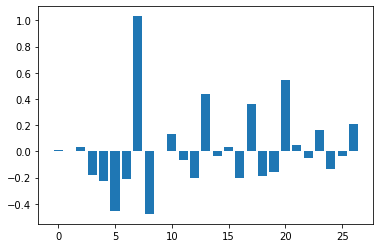

In [14]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

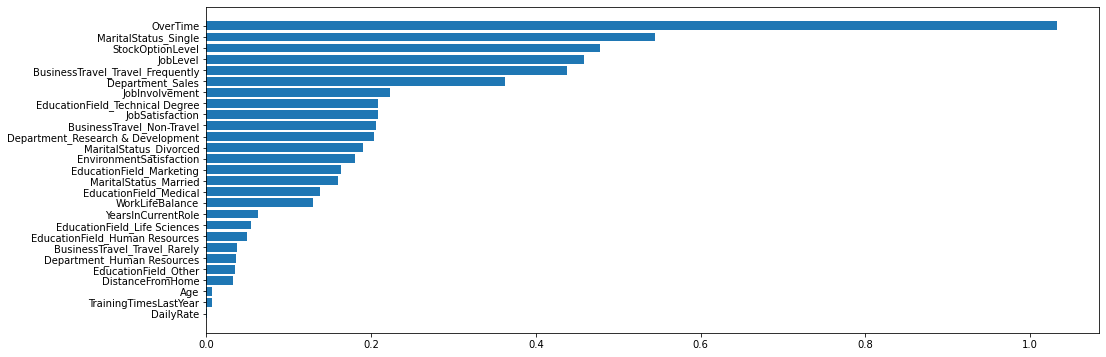

In [15]:
#SORT VALUES ACCORDING TO IMPORTANCE SCORE AND OUTPUT FEATURE IMPORTANCE BAR CHART BY VARIABLE (SORTED)
sorted_imp = list(np.argsort(np.abs(importance)))
plt.figure(figsize=(16,6))
plt.barh(featureImp.columns[sorted_imp], np.abs(importance)[sorted_imp])
imp_logreg = pd.DataFrame(data = {"Feature": featureImp.columns[sorted_imp], "Importance Score": np.abs(importance)[sorted_imp]})
imp_logreg.to_excel("logreg_ftImp.xlsx")

# Random Forests: Feature Importance

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# fit the model
model.fit(X, y)


RandomForestClassifier()

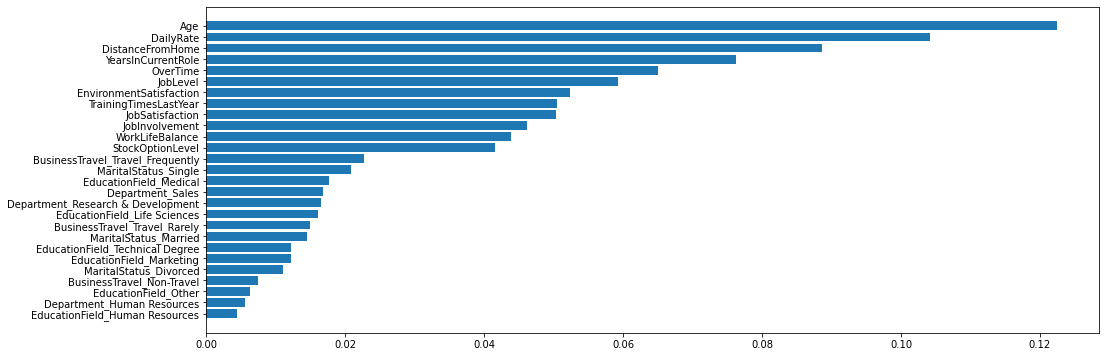

In [17]:
#SORT VALUES ACCORDING TO IMPORTANCE SCORE AND OUTPUT FEATURE IMPORTANCE BAR CHART BY VARIABLE (SORTED)
sorted = model.feature_importances_.argsort()
plt.figure(figsize=(16,6))
plt.barh(featureImp.columns[sorted], model.feature_importances_[sorted])
imp_rf = pd.DataFrame(data = {"Feature": featureImp.columns[sorted], "Importance Score": model.feature_importances_[sorted]})
imp_rf.to_excel("rf_ftImp.xlsx")